<a href="https://colab.research.google.com/github/keshavyadav001308/Flower-classification-using-cnn-with-transfer-learning/blob/main/transfer_learning_Dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import pathlib


In [9]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

data_dir = tf.keras.utils.get_file(
    "flower_photos",
    origin=dataset_url,
    untar=True
)

data_dir = pathlib.Path(data_dir) / "flower_photos"



In [10]:
data_dir

PosixPath('/root/.keras/datasets/flower_photos/flower_photos')

In [11]:
img_height = 180
img_width = 180
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)




Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names)


['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [13]:
import os

for item in os.listdir(data_dir):
    print(item)


tulips
daisy
LICENSE.txt
sunflowers
roses
dandelion


In [14]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])


In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(180, 180, 3)),   # 👈 VERY IMPORTANT

    data_augmentation,
    layers.Rescaling(1./255),

    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Dropout(0.5),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])



In [19]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [20]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,647,621 (25.36 MB)

 Trainable params: 6,647,621 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
epochs = 15

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    verbose=2
)


Epoch 1/15
92/92 - 15s - 166ms/step - accuracy: 0.4298 - loss: 1.3064 - val_accuracy: 0.5777 - val_loss: 1.0826
Epoch 2/15
92/92 - 6s - 64ms/step - accuracy: 0.5777 - loss: 1.0570 - val_accuracy: 0.6144 - val_loss: 1.0173
Epoch 3/15
92/92 - 11s - 115ms/step - accuracy: 0.6168 - loss: 0.9445 - val_accuracy: 0.5954 - val_loss: 1.0220
Epoch 4/15
92/92 - 11s - 115ms/step - accuracy: 0.6700 - loss: 0.8651 - val_accuracy: 0.6635 - val_loss: 0.8492
Epoch 5/15
92/92 - 10s - 112ms/step - accuracy: 0.6873 - loss: 0.8024 - val_accuracy: 0.6894 - val_loss: 0.8400
Epoch 6/15
92/92 - 6s - 67ms/step - accuracy: 0.7030 - loss: 0.7842 - val_accuracy: 0.6866 - val_loss: 0.8029
Epoch 7/15
92/92 - 10s - 108ms/step - accuracy: 0.7275 - loss: 0.7242 - val_accuracy: 0.7057 - val_loss: 0.7534
Epoch 8/15
92/92 - 11s - 123ms/step - accuracy: 0.7248 - loss: 0.7030 - val_accuracy: 0.7125 - val_loss: 0.7173
Epoch 9/15
92/92 - 10s - 111ms/step - accuracy: 0.7306 - loss: 0.6861 - val_accuracy: 0.7139 - val_loss: 0.7

In [23]:
test_loss, test_accuracy = model.evaluate(train_ds, verbose=2)

print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)


92/92 - 4s - 40ms/step - accuracy: 0.8198 - loss: 0.4743
Test Accuracy: 0.8198229074478149
Test Loss: 0.47433221340179443


In [24]:
import numpy as np

y_true = []
y_pred = []

for images, labels in val_ds:
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)

    y_true.extend(labels.numpy())
    y_pred.extend(predicted_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


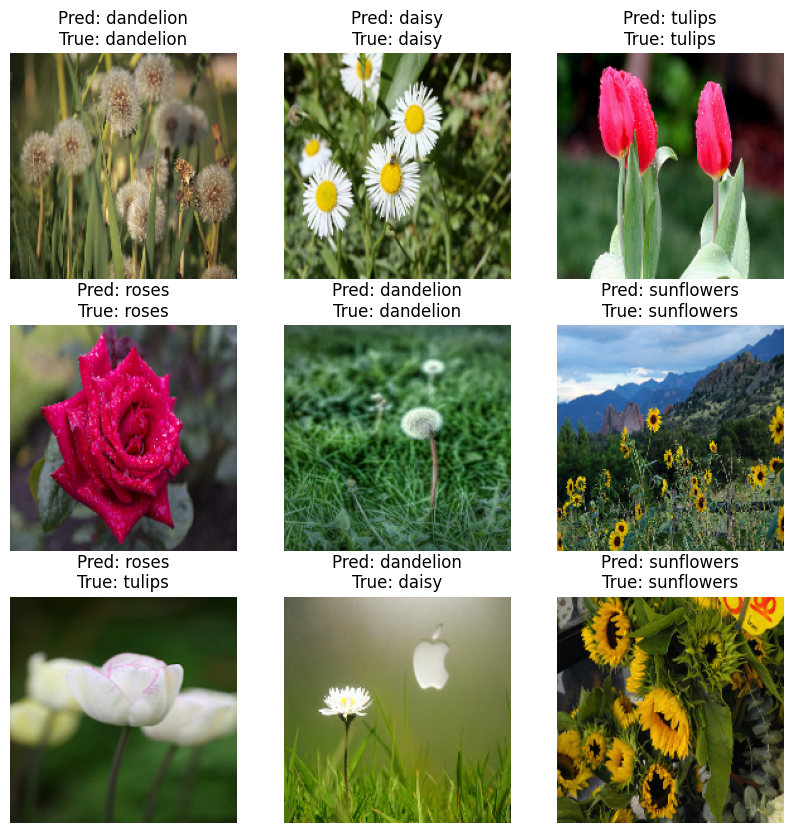

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for images, labels in val_ds.take(1):
    predictions = model.predict(images)

    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        pred_label = class_names[np.argmax(predictions[i])]
        true_label = class_names[labels[i]]

        plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
        plt.axis("off")

plt.show()


In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=class_names))



              precision    recall  f1-score   support

       daisy       0.65      0.75      0.70       129
   dandelion       0.89      0.66      0.76       176
       roses       0.64      0.53      0.58       120
  sunflowers       0.82      0.90      0.86       152
      tulips       0.65      0.78      0.71       157

    accuracy                           0.73       734
   macro avg       0.73      0.72      0.72       734
weighted avg       0.74      0.73      0.73       734



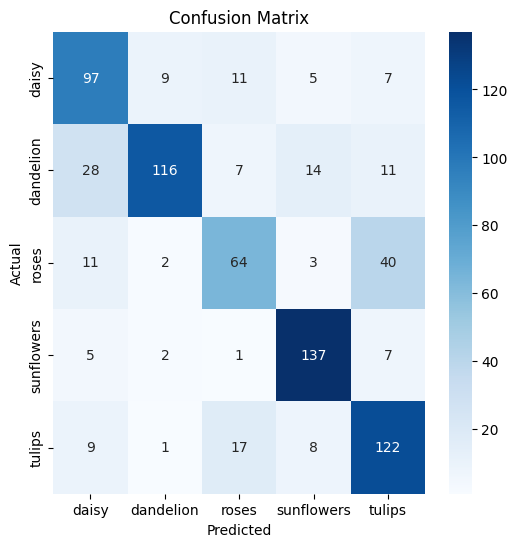

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=class_names,
            yticklabels=class_names,
            cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [28]:
val_ds.file_paths
# Print first 10 image file paths from validation dataset
for i, path in enumerate(val_ds.file_paths[:10]):
    print(f"{i+1}: {path}")


1: /root/.keras/datasets/flower_photos/flower_photos/sunflowers/14932787983_d6e05f2434_m.jpg
2: /root/.keras/datasets/flower_photos/flower_photos/roses/326541992_d542103ca8_n.jpg
3: /root/.keras/datasets/flower_photos/flower_photos/dandelion/15381511376_fd743b7330_n.jpg
4: /root/.keras/datasets/flower_photos/flower_photos/dandelion/5416388641_c66d52d2ff_m.jpg
5: /root/.keras/datasets/flower_photos/flower_photos/tulips/4579079143_f65b39dd9f.jpg
6: /root/.keras/datasets/flower_photos/flower_photos/roses/1775233884_12ff5a124f.jpg
7: /root/.keras/datasets/flower_photos/flower_photos/roses/2756028421_b3d5eea526_n.jpg
8: /root/.keras/datasets/flower_photos/flower_photos/sunflowers/9240005603_6a9b71dcea_n.jpg
9: /root/.keras/datasets/flower_photos/flower_photos/tulips/6958343928_7e596da4ed_m.jpg
10: /root/.keras/datasets/flower_photos/flower_photos/daisy/2551708158_1f10e81e11.jpg


Now using Transfer Learning

In [29]:
import tensorflow as tf
from tensorflow.keras import layers, models


In [30]:
IMG_SIZE = (224, 224)


In [31]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=32
)


Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


cache() stores the dataset in memory to avoid repeated disk access,
 while prefetch() overlaps data preprocessing and model execution.
 AUTOTUNE allows TensorFlow to automatically optimize performance.

In [32]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [33]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])


In [34]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [35]:
base_model.trainable = False


In [37]:
class_names=

In [41]:
num_classes = len(class_names)

model = tf.keras.Sequential([
    layers.Input(shape=(224, 224, 3)),
    data_augmentation,
    layers.Lambda(tf.keras.applications.mobilenet_v2.preprocess_input),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])


In [42]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [43]:
epochs = 10

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    verbose=2
)


Epoch 1/10
92/92 - 19s - 202ms/step - accuracy: 0.3389 - loss: 1.6166 - val_accuracy: 0.4591 - val_loss: 1.2873
Epoch 2/10
92/92 - 6s - 65ms/step - accuracy: 0.5089 - loss: 1.2435 - val_accuracy: 0.6267 - val_loss: 1.0034
Epoch 3/10
92/92 - 6s - 64ms/step - accuracy: 0.6093 - loss: 1.0163 - val_accuracy: 0.7207 - val_loss: 0.8399
Epoch 4/10
92/92 - 6s - 63ms/step - accuracy: 0.6635 - loss: 0.8896 - val_accuracy: 0.7643 - val_loss: 0.7364
Epoch 5/10
92/92 - 6s - 64ms/step - accuracy: 0.7037 - loss: 0.8024 - val_accuracy: 0.7820 - val_loss: 0.6674
Epoch 6/10
92/92 - 6s - 63ms/step - accuracy: 0.7394 - loss: 0.7256 - val_accuracy: 0.8134 - val_loss: 0.6121
Epoch 7/10
92/92 - 6s - 65ms/step - accuracy: 0.7548 - loss: 0.6872 - val_accuracy: 0.8229 - val_loss: 0.5704
Epoch 8/10
92/92 - 6s - 63ms/step - accuracy: 0.7745 - loss: 0.6276 - val_accuracy: 0.8420 - val_loss: 0.5396
Epoch 9/10
92/92 - 6s - 67ms/step - accuracy: 0.7875 - loss: 0.5946 - val_accuracy: 0.8460 - val_loss: 0.5136
Epoch 10

In [44]:
model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │         6,405 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,277,201 (8.69 MB)

 Trainable params: 6,405 (25.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 12,812 (50.05 KB)

In [45]:
loss, accuracy = model.evaluate(val_ds)
print("Validation Accuracy:", accuracy)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.8672 - loss: 0.4915
Validation Accuracy: 0.8542234301567078


In [48]:
import numpy as np

y_true = []
y_pred = []

for images, labels in val_ds:
    predictions = model.predict(images, verbose=0)
    predicted_classes = np.argmax(predictions, axis=1)

    y_true.extend(labels.numpy())
    y_pred.extend(predicted_classes)


confusion matrix after using transfer learning

In [49]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
print(cm)


[[114   4   4   2   5]
 [  5 161   1   8   1]
 [  0   3  94   3  20]
 [ 11   5   5 127   4]
 [  2   1  17   6 131]]


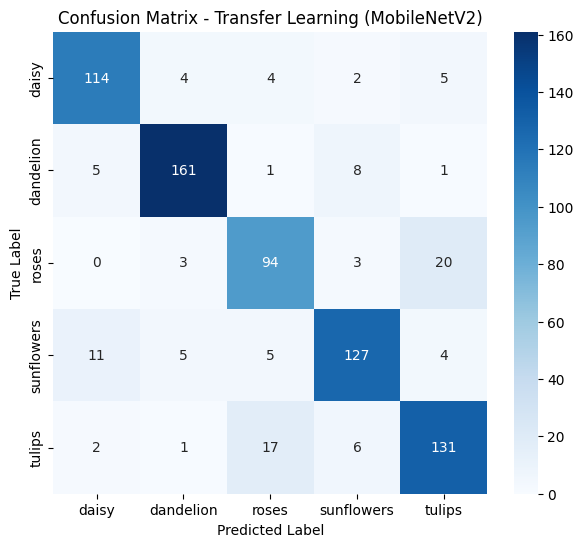

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Transfer Learning (MobileNetV2)")
plt.show()


This is called Fine-Tuning in Transfer Learning

It means:

Allowing a small part of the pre-trained model to learn again so it adapts better to your dataset.

In [51]:
base_model.trainable = True

for layer in base_model.layers[:-50]:
    layer.trainable = False


In [52]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [53]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,
    verbose=2
)


Epoch 1/5
92/92 - 24s - 265ms/step - accuracy: 0.7166 - loss: 0.7459 - val_accuracy: 0.8488 - val_loss: 0.4324
Epoch 2/5
92/92 - 9s - 94ms/step - accuracy: 0.8062 - loss: 0.5465 - val_accuracy: 0.8569 - val_loss: 0.3890
Epoch 3/5
92/92 - 9s - 95ms/step - accuracy: 0.8345 - loss: 0.4709 - val_accuracy: 0.8638 - val_loss: 0.3588
Epoch 4/5
92/92 - 9s - 95ms/step - accuracy: 0.8522 - loss: 0.4044 - val_accuracy: 0.8733 - val_loss: 0.3363
Epoch 5/5
92/92 - 9s - 96ms/step - accuracy: 0.8750 - loss: 0.3572 - val_accuracy: 0.8801 - val_loss: 0.3217


In [54]:
loss, accuracy = model.evaluate(val_ds)
print("Validation Accuracy:", accuracy)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.8746 - loss: 0.3331
Validation Accuracy: 0.8801090121269226


| Model Type                      | Epochs | Accuracy   |
| ------------------------------- | ------ | ---------- |
| CNN from Scratch                | 15     | 81.98%     |
| Transfer Learning               | 10     | 85.42%     |
| Transfer Learning + Fine-Tuning | 5      | **88.01%** |


Transfer learning with fine-tuning significantly improved image classification accuracy while reducing training time and overfitting compared to a CNN trained from scratch.
